In [11]:
# imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import pydicom

In [6]:
# Load metadata
train_df = pd.read_csv("train.csv")
train_bbox = pd.read_csv("train_bounding_boxes.csv")

# Print dataframe shapes
print('train shape:', train_df.shape)
print('train bbox shape:', train_bbox.shape)
print('')

# Show first few entries
train_df.head(3)

train shape: (2019, 9)
train bbox shape: (7217, 6)



,StudyInstanceUID,patient_overall,C1,C2,C3,C4,C5,C6,C7
0,1.2.826.0.1.3680043.6200,1,1,1,0,0,0,0,0
1,1.2.826.0.1.3680043.27262,1,0,1,0,0,0,0,0
2,1.2.826.0.1.3680043.21561,1,0,1,0,0,0,0,0


In [7]:
print(f'Patients with bounding box measurements: {train_bbox["StudyInstanceUID"].nunique()} ({np.round(100*train_bbox["StudyInstanceUID"].nunique()/len(train_df),1)} %)')

Patients with bounding box measurements: 235 (11.6 %)


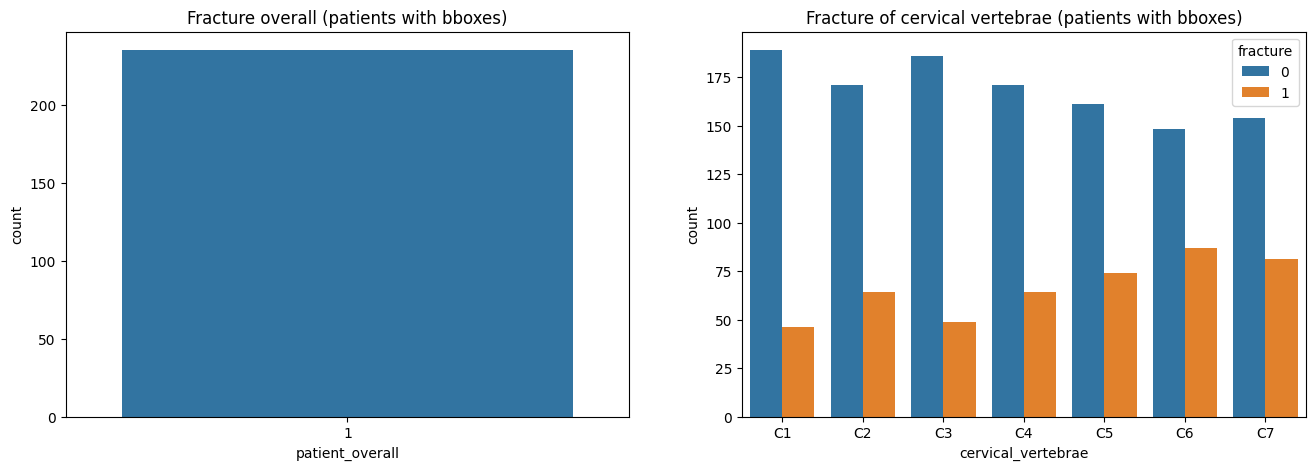

In [8]:

train_df_bbox = train_df[train_df["StudyInstanceUID"].isin(train_bbox["StudyInstanceUID"])]

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 5))
sns.countplot(x="patient_overall", data=train_df_bbox, ax=ax1)
ax1.set_title("Fracture overall (patients with bboxes)")

train_df_bbox_melt = pd.melt(train_df_bbox, id_vars=["StudyInstanceUID", "patient_overall"], var_name="cervical_vertebrae", value_name="fracture")
sns.countplot(x="cervical_vertebrae", hue="fracture", data=train_df_bbox_melt, ax=ax2)
ax2.set_title("Fracture of cervical vertebrae (patients with bboxes)")
plt.show()

Text(0.5, 0, 'Number of bboxes')

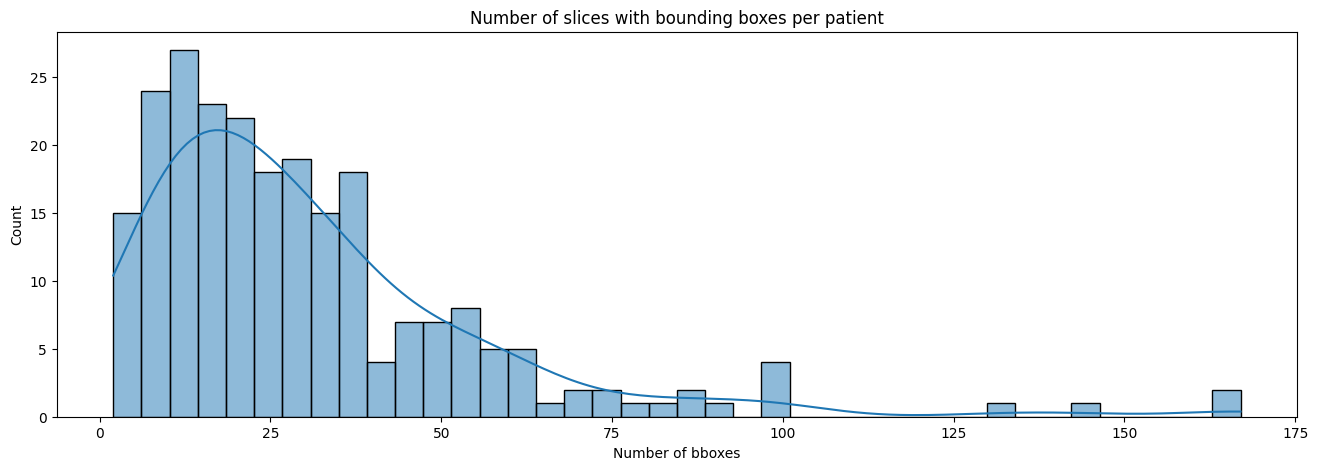

In [9]:
plt.figure(figsize=(16,5))
sns.histplot(train_bbox["StudyInstanceUID"].value_counts().values, kde=True, bins=40)
plt.title('Number of slices with bounding boxes per patient')
plt.xlabel('Number of bboxes')

Text(0.5, 1.0, 'Width and heights')

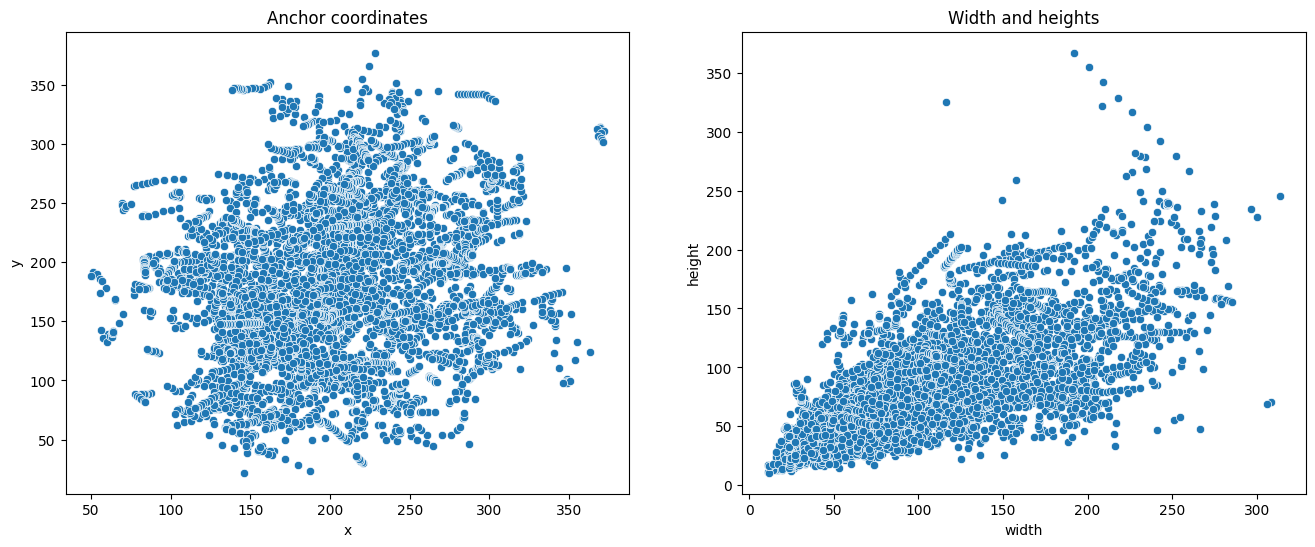

In [10]:
plt.figure(figsize=(16,6))
plt.subplot(1,2,1)
sns.scatterplot(data=train_bbox, x='x', y='y')
plt.title('Anchor coordinates')

plt.subplot(1,2,2)
sns.scatterplot(data=train_bbox, x='width', y='height')
plt.title('Width and heights')

# Ejemplo de Fracturas

In [ ]:
def plot_fracture(slice_num,bbox_id,ax_id1,ax_id2):
    file = pydicom.dcmread(f"{base_path}/train_images/{bbox_id}/{slice_num}.dcm")
    img = apply_voi_lut(file.pixel_array, file)
    info = train_bbox[(train_bbox['StudyInstanceUID']==bbox_id)&(train_bbox['slice_number']==slice_num)]
    rect = patches.Rectangle((float(info.x), float(info.y)), float(info.width), float(info.height), linewidth=3, edgecolor='r', facecolor='none')

    axes[ax_id1,ax_id2].imshow(img, cmap="bone")
    axes[ax_id1,ax_id2].add_patch(rect)
    axes[ax_id1,ax_id2].set_title(f"ID:{bbox_id}, Slice: {slice_num}", fontsize=20, weight='bold',y=1.02)
    axes[ax_id1,ax_id2].axis('off')

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(24,24))
plot_fracture(119,'1.2.826.0.1.3680043.25651',0,0)
plot_fracture(156,'1.2.826.0.1.3680043.23817',0,1)
plot_fracture(325,'1.2.826.0.1.3680043.12031',1,0)
plot_fracture(151,'1.2.826.0.1.3680043.11899',1,1)